# ECE227: Homework 4

## Task 1: Heuristically Optimized Trade-offs (HOT) Based Models
### Part 1:
### In this part of the task you are going to generate a random network based on a simple optimization criteria: Each newly added node ($i$) which has a uniformly random position $(x,y)$ on a unit square, takes into account its distance ($d_{ij}$) to other nodes ($j<i$) as well as the hop count ($h_j$) from that node to a central node in the network to decide which node to connect to. The node to connect to is chosen as follows:
### $$node = argmin_{j<i} \   \alpha d_{ij} + h_j $$
### Here $ \alpha $ is a parameter gauging the relative importance of the two objectives.
### You are supposed to:
### -- Generate a network with $n=500$ nodes based on the above optimization model with $\alpha = 5$. Here, choose the first node as the central node.
### -- Visualize the network using NetworkX built-in visulization method which can take into account the position of each node on the plane as well (nx.draw()). Make sure to highlight the central node with a different color using nx.draw_networkx_nodes().
### -- Plot the degree distribution and decide whether it is close to a Binomial, Exponential, or Power law distribution in your opinion.
### -- Repeat the task for $\alpha = 1,10,100 $ and compare the results.

In [2]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
from random import randint
from IPython.display import SVG
import cvxpy as cp
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os
import math
import collections
import powerlaw
import cv2

Populating the interactive namespace from numpy and matplotlib
CPU times: user 2.58 s, sys: 1.52 s, total: 4.1 s
Wall time: 3.4 s


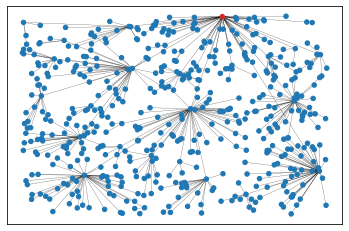

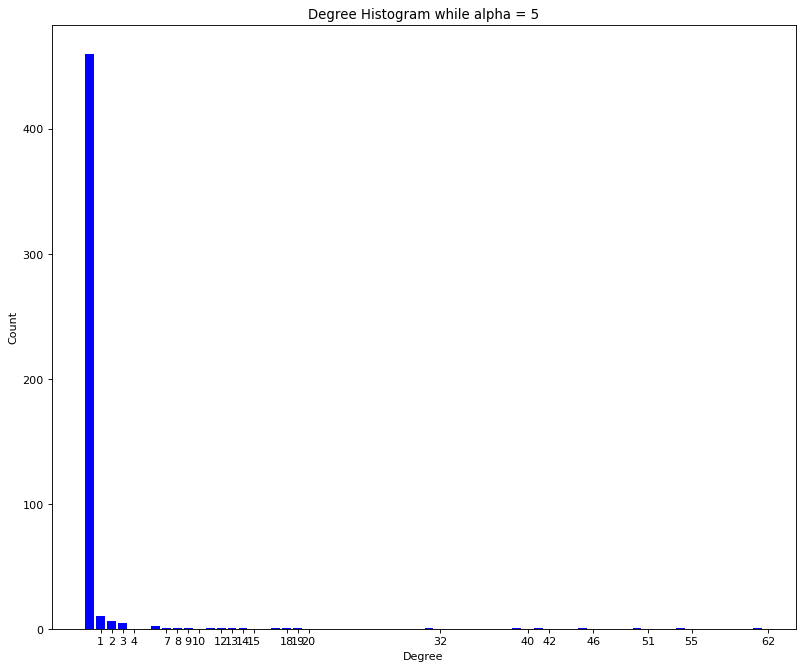

In [88]:
g1=nx.Graph()
for i in range(500):
    g1.add_node(i)
pos = nx.random_layout(g1)

for i in range(500):
    argmin = 500
    node = 500
    for j in range(i):
        eucdis = 5*round(math.sqrt(((pos[i][1]-pos[j][1])**2)+((pos[i][0]-pos[j][0])**2)),2)
        hopcount = nx.algorithms.shortest_paths.generic.shortest_path_length(g1,j,0)
        summ = eucdis+hopcount
        if summ < argmin:
            argmin = summ
            node = j
    if node != 500:
        g1.add_edge(i, node)

uniform_position = np.random.uniform(0,1,tuple([500,500]))
# DICT = {}
colors = []
for i in range(500):
#     DICT[i] = tuple([uniform_position[0][i], uniform_position[1][i]])
    if i==0:
        colors.append('#d62728')
    else:
        colors.append('#1f78b4') 

nx.drawing.nx_pylab.draw_networkx_nodes(g1, pos, None, 20, colors)
nx.drawing.nx_pylab.draw_networkx_edges(g1, pos, None, 0.2)

degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 5")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()

###############################################
#the graph follows a power law distribution

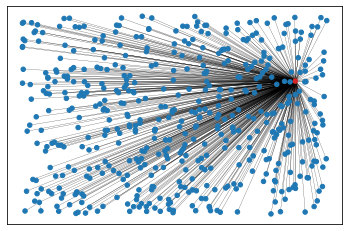

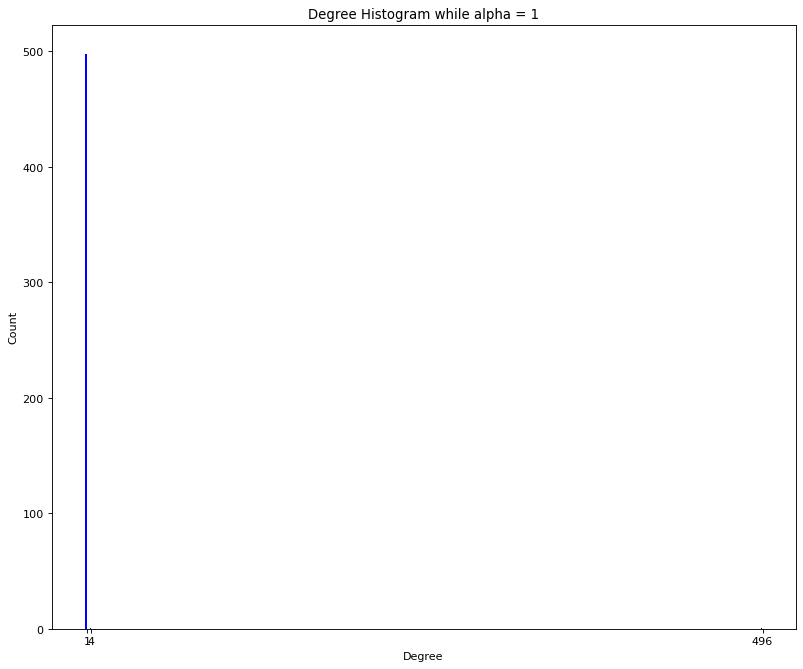

In [89]:
g1=nx.Graph()
for i in range(500):
    g1.add_node(i)
pos = nx.random_layout(g1)

for i in range(500):
    argmin = 500
    node = 500
    for j in range(i):
        eucdis = round(math.sqrt(((pos[i][1]-pos[j][1])**2)+((pos[i][0]-pos[j][0])**2)),2)
        hopcount = nx.algorithms.shortest_paths.generic.shortest_path_length(g1,j,0)
        summ = eucdis+hopcount
        if summ < argmin:
            argmin = summ
            node = j
    if node != 500:
        g1.add_edge(i, node)

uniform_position = np.random.uniform(0,1,tuple([500,500]))
# DICT = {}
colors = []
for i in range(500):
#     DICT[i] = tuple([uniform_position[0][i], uniform_position[1][i]])
    if i==0:
        colors.append('#d62728')
    else:
        colors.append('#1f78b4') 

nx.drawing.nx_pylab.draw_networkx_nodes(g1, pos, None, 20, colors)
nx.drawing.nx_pylab.draw_networkx_edges(g1, pos, None, 0.2)

degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()
###############################################
#the graph follows a power law distribution

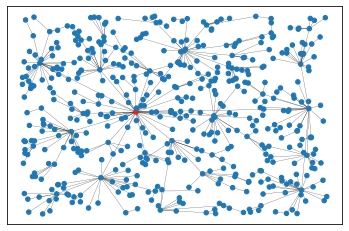

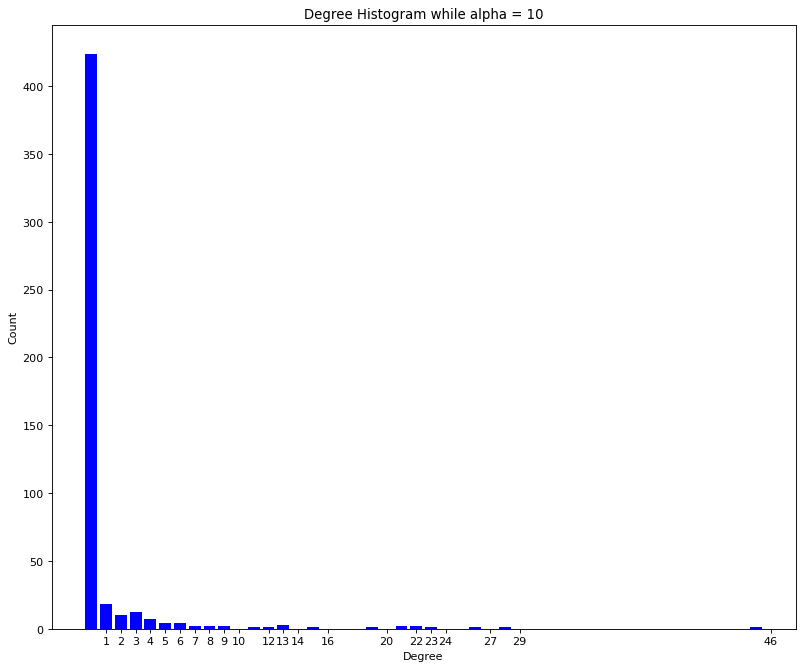

In [90]:
g1=nx.Graph()
for i in range(500):
    g1.add_node(i)
pos = nx.random_layout(g1)

for i in range(500):
    argmin = 500
    node = 500
    for j in range(i):
        eucdis = 10*round(math.sqrt(((pos[i][1]-pos[j][1])**2)+((pos[i][0]-pos[j][0])**2)),2)
        hopcount = nx.algorithms.shortest_paths.generic.shortest_path_length(g1,j,0)
        summ = eucdis+hopcount
        if summ < argmin:
            argmin = summ
            node = j
    if node != 500:
        g1.add_edge(i, node)

uniform_position = np.random.uniform(0,1,tuple([500,500]))
# DICT = {}
colors = []
for i in range(500):
#     DICT[i] = tuple([uniform_position[0][i], uniform_position[1][i]])
    if i==0:
        colors.append('#d62728')
    else:
        colors.append('#1f78b4') 

nx.drawing.nx_pylab.draw_networkx_nodes(g1, pos, None, 20, colors)
nx.drawing.nx_pylab.draw_networkx_edges(g1, pos, None, 0.2)

degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 10")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()
###############################################
#the graph follows a power law distribution

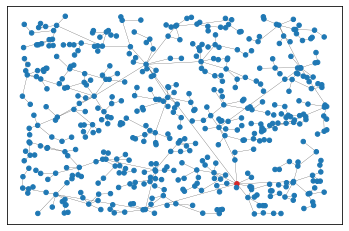

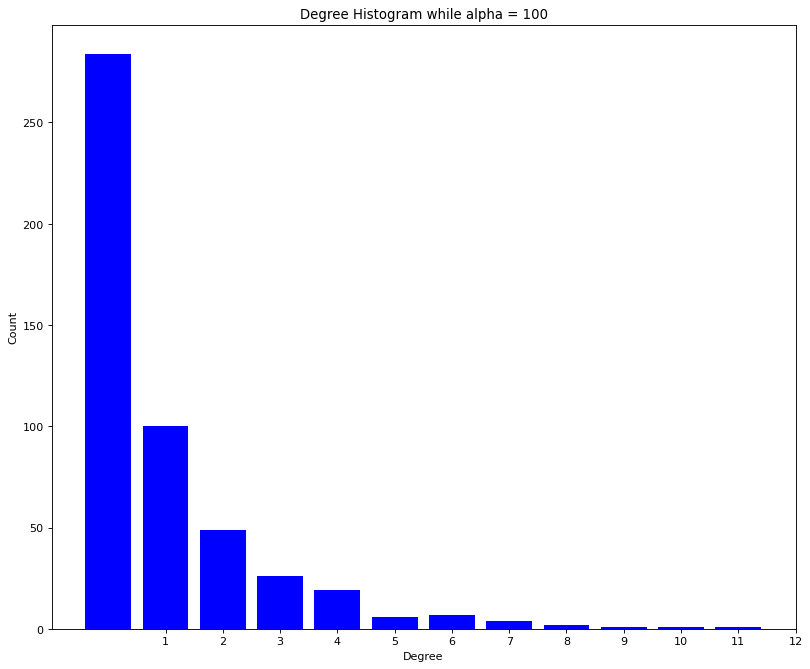

In [91]:
g1=nx.Graph()
for i in range(500):
    g1.add_node(i)
pos = nx.random_layout(g1)

for i in range(500):
    argmin = 500
    node = 500
    for j in range(i):
        eucdis = 100*round(math.sqrt(((pos[i][1]-pos[j][1])**2)+((pos[i][0]-pos[j][0])**2)),2)
        hopcount = nx.algorithms.shortest_paths.generic.shortest_path_length(g1,j,0)
        summ = eucdis+hopcount
        if summ < argmin:
            argmin = summ
            node = j
    if node != 500:
        g1.add_edge(i, node)

uniform_position = np.random.uniform(0,1,tuple([500,500]))
# DICT = {}
colors = []
for i in range(500):
#     DICT[i] = tuple([uniform_position[0][i], uniform_position[1][i]])
    if i==0:
        colors.append('#d62728')
    else:
        colors.append('#1f78b4') 

nx.drawing.nx_pylab.draw_networkx_nodes(g1, pos, None, 20, colors)
nx.drawing.nx_pylab.draw_networkx_edges(g1, pos, None, 0.2)

degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 100")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()
###############################################
#the graph follows a power law distribution

In [ ]:
#############################################################################################################################################
#With larger alpha, the weight of hop count from the chosen node to the central node becomes greater, and hence all nodes tend to connect to
#a node nearby. When alpha is low, the nodes are very likely to connect to the central node, because the euclidean distance is more significant
#############################################################################################################################################

### Part 2: 
### In this part of the task you are given a core network inspired by an actual infrastructure and you are supposed to connect random nodes to the nodes of this core network according to a power law. Then you are supposed to calculate a performance measure for this network. 
### Then, you are supposed to create a preferential attachment random graph based on the Barabasi-Albert model with the same number of nodes and compare the perfomance measure of this network to the first network. 
### Create the following graph in NetworkX.

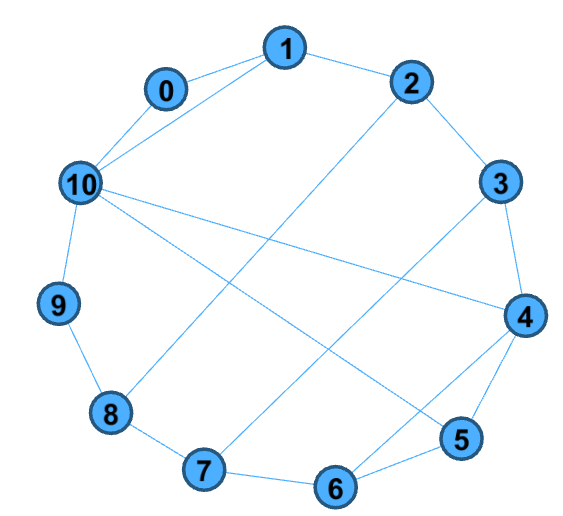

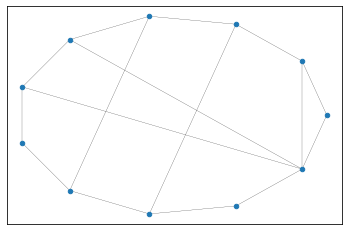

In [5]:
g2 = nx.Graph()

for i in range(11):
    g2.add_node(i)
    if i>0:
        g2.add_edge(i,i-1)

g2.add_edge(i,0)
g2.add_edge(1, 10)
g2.add_edge(2, 8)
g2.add_edge(3, 7)
g2.add_edge(4, 10)
g2.add_edge(5, 10)

pos = nx.circular_layout(g2)
nx.drawing.nx_pylab.draw_networkx_nodes(g2, pos, None, 20)
nx.drawing.nx_pylab.draw_networkx_edges(g2, pos, None, 0.2)

### To each node of the above core network connect random number of new nodes according to a power law distribution with mean 10 and $\alpha = 3$.

mean: 10.04082175797415


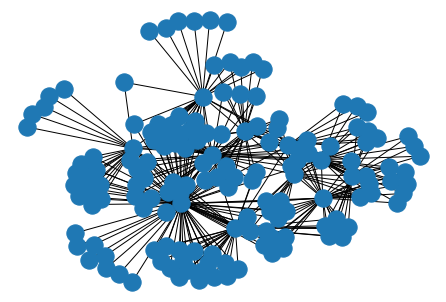

In [9]:
distribution = powerlaw.Power_Law(xmin = 4.9, parameters = [3])

array = distribution.generate_random(5500)
print("mean:",np.mean(array))

summ = 0
index = 0
for i in range(11):
    if i==0:
        summ+=round(array[500*i])
        for j in range(round(array[550*i])):
            g2.add_node(index)
            g2.add_edge(index, i)
            index+=1
            
    else:
        summ+=round(array[500*i-1])
        for j in range(round(array[550*i-1])):
            g2.add_node(index)
            g2.add_edge(index, i)
            index+=1
        
nx.draw(g2)

### Visualize the resulted graph using gephi and include the visualization in SVG format in your notebook.

In [160]:
nx.write_gml(g2, "task1.gml")

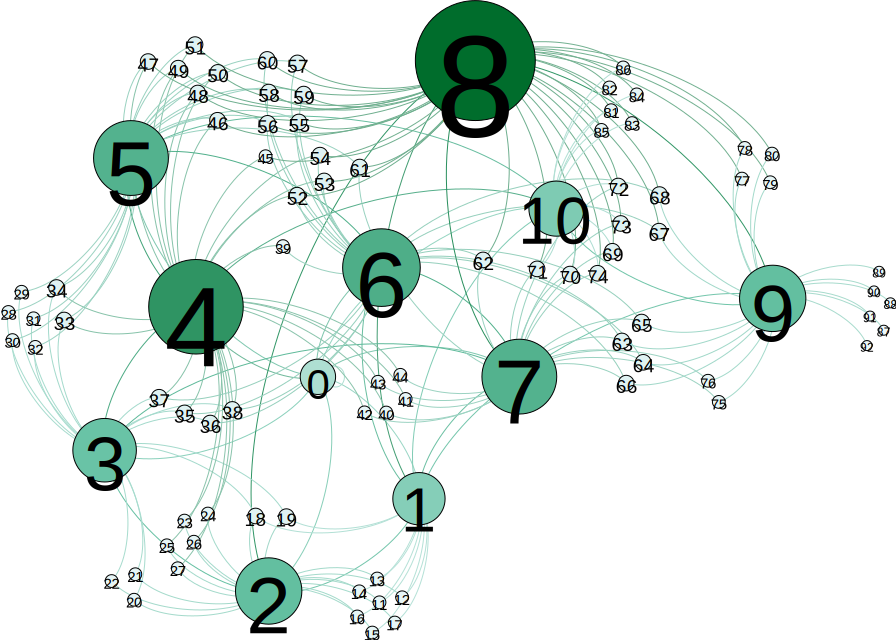

In [122]:
display(SVG('tas1.svg'))

### For each pair of the newly added nodes perform shortest-path routing using NetworkX and create a binary matrix $R$ such that each row of the matrix correspond to a core node and each column correspond to an ordered pair of newly added nodes. Each element of this matrix is "one" if the shortest path between the corresponding pair goes through the corresponding core node and "zero" otherwise. This matrix is sometimes called the routing matrix.

In [36]:
R = np.zeros((11, summ*(summ-1)))
for i in range(11):
    R[i, 0] = i
    index = 1
    for j in range(summ):
        for k in range(summ-j):
            SP = nx.algorithms.shortest_paths.generic.shortest_path(g2,11+j, 11+j+k)
            if i in SP:
                R[i, index] = 1
            else:
                R[i, index] = 0
            index += 1
            
print(summ, "newly added nodes")
for i in range(11):
    if i==1:
        pairs = R[i].tolist()
        print("the pair of nodes whose shortest path between passes core node", i, "is", pairs.count(1)-1)
    else:
        pairs = R[i].tolist()
        print("the pair of nodes whose shortest path between passes core node", i, "is", pairs.count(1))

117 newly added nodes
the pair of nodes whose shortest path between passes core node 0 is 1602
the pair of nodes whose shortest path between passes core node 1 is 179
the pair of nodes whose shortest path between passes core node 2 is 201
the pair of nodes whose shortest path between passes core node 3 is 673
the pair of nodes whose shortest path between passes core node 4 is 418
the pair of nodes whose shortest path between passes core node 5 is 1660
the pair of nodes whose shortest path between passes core node 6 is 1278
the pair of nodes whose shortest path between passes core node 7 is 2625
the pair of nodes whose shortest path between passes core node 8 is 439
the pair of nodes whose shortest path between passes core node 9 is 174
the pair of nodes whose shortest path between passes core node 10 is 252


### Find the solution to the following linear programming using the $cvxpy$ library:
### $$ Maximize \sum X_{i,j} $$
### $$ s.t. \ \ X_{i,j} \ge 0 , RX\le B  $$

### Here, $B$ is a vector containing the maximum bandwidth of each of the core nodes. In this homework assume that all the elements of this vector are set to 10.

In [95]:
B = np.array([10,10,10,10,10,10,10,10,10,10,10])
R_resize = np.resize(R, (summ*(summ-1), 11))
# Construct the problem.
x = cp.Variable((1,11))
objective = cp.Maximize(cp.sum(x))
result = np.zeros(11)
x_np = np.array(x)
print(x_np)
for i in range(11):
    for j in range(summ*(summ-1)-1):
        result[i] += x_np[i]*R[i,j+1]
constraints = [0 <= x, result <= B]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

var298868


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

### Now create a Barabasi-Albert random graph with the same number of nodes as the previous graph and $m=1$ and visualize it using Gephi.

In [66]:
g3 = nx.generators.random_graphs.barabasi_albert_graph(summ+11, 1)
nx.write_gml(g3, "Barabasi.gml")

(-0.5, 1023.5, 1023.5, -0.5)

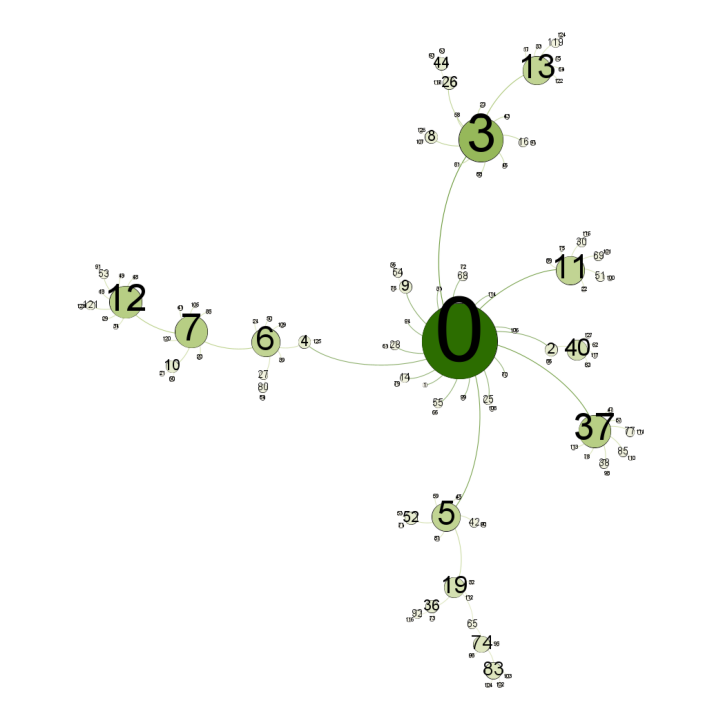

In [69]:
plt.figure(figsize=(13, 13))

img1 = cv2.imread('barabasi.png') 
plt.imshow(img1)
plt.axis('off')

### Calculate the routing matrix for this random graph with the first 11 nodes as the core. (Ignore the pairs whose shortest path does not go through the core.)

In [73]:
Nodenum = nx.Graph.number_of_nodes(g3) - 11
R = np.zeros((11, Nodenum*(Nodenum-1)))
for i in range(11):
    R[i, 0] = i
    index = 1
    for j in range(Nodenum):
        for k in range(Nodenum-j):
            SP = nx.algorithms.shortest_paths.generic.shortest_path(g3,11+j, 11+j+k)
            if i in SP:
                R[i, index] = 1
            else:
                R[i, index] = 0
            index += 1
            
print(Nodenum, "newly added nodes")
for i in range(11):
    if i==1:
        pairs = R[i].tolist()
        print("the pair of nodes whose shortest path between passes core node", i, "is", pairs.count(1)-1)
    else:
        pairs = R[i].tolist()
        print("the pair of nodes whose shortest path between passes core node", i, "is", pairs.count(1))

117 newly added nodes
the pair of nodes whose shortest path between passes core node 0 is 5857
the pair of nodes whose shortest path between passes core node 1 is 0
the pair of nodes whose shortest path between passes core node 2 is 671
the pair of nodes whose shortest path between passes core node 3 is 2375
the pair of nodes whose shortest path between passes core node 4 is 2324
the pair of nodes whose shortest path between passes core node 5 is 2306
the pair of nodes whose shortest path between passes core node 6 is 2369
the pair of nodes whose shortest path between passes core node 7 is 1790
the pair of nodes whose shortest path between passes core node 8 is 231
the pair of nodes whose shortest path between passes core node 9 is 344
the pair of nodes whose shortest path between passes core node 10 is 231


### Now solve the previous optimization problem for this random graph and compare the result with the previous result. Which network has a higher performance? Explain why.

## Task 2: More on the Barabasi-Albert Model

### In the previous task, you evaluated the abilities of Barabasi-Albert networks to transfer data from one node to another. In this task, you will explore these networks further.

### Using NetworkX generate four Barabasi-Albert Random Graphs (BARGs) with n = 1000, 10000 nodes and with parameter m = 2 , 5.  

In [96]:
g4 = nx.generators.random_graphs.barabasi_albert_graph(1000, 2)
g5 = nx.generators.random_graphs.barabasi_albert_graph(1000, 5)
g6 = nx.generators.random_graphs.barabasi_albert_graph(10000, 2)
g7 = nx.generators.random_graphs.barabasi_albert_graph(10000, 5)

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi such that each node has a size proportional to its degree and its color is also related to its degree. Include your visualizations in this notebook. Do you see an interesting property for these graphs? Explain your answer.

In [97]:
nx.write_gml(g4, "task21.gml")
nx.write_gml(g5, "task22.gml")
nx.write_gml(g6, "task23.gml")
nx.write_gml(g7, "task24.gml")

(-0.5, 1023.5, 1023.5, -0.5)

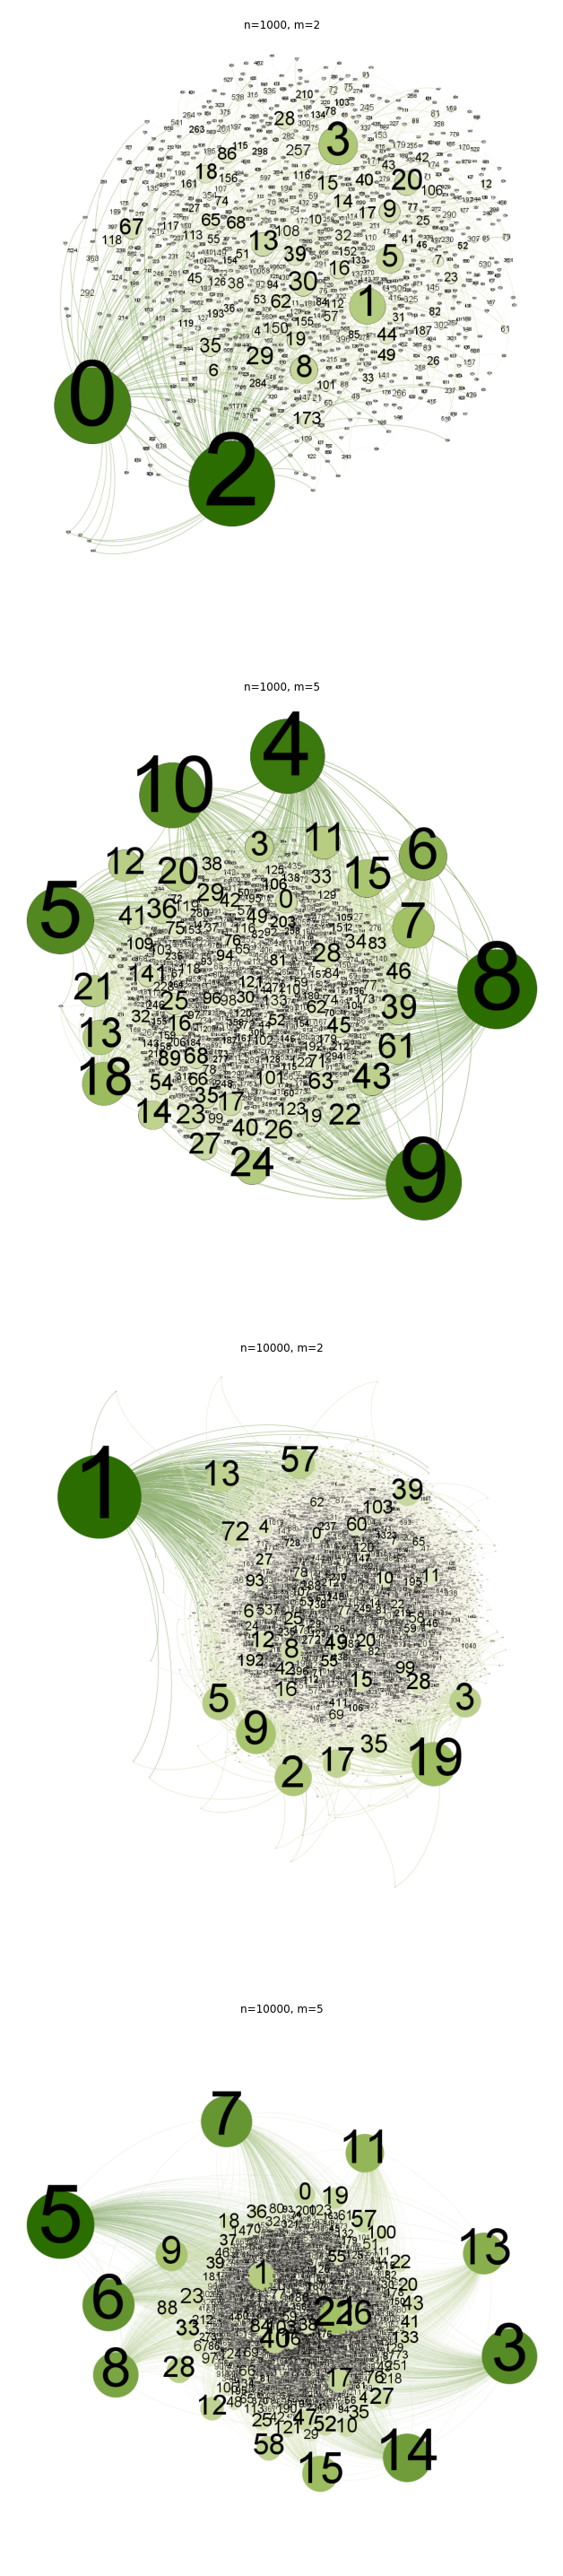

In [100]:
plt.figure(figsize=(13, 52))

img5 = cv2.imread('task21.png') 
plt.subplot(4,1,1)
plt.title('\nn=1000, m=2')
plt.imshow(img5)
plt.axis('off')

img2 = cv2.imread('task22.png') 
plt.subplot(4,1,2)
plt.title('\nn=1000, m=5')
plt.imshow(img2)
plt.axis('off')

img3 = cv2.imread('task23.png') 
plt.subplot(4,1,3)
plt.title('\nn=10000, m=2')
plt.imshow(img3)
plt.axis('off')

img4 = cv2.imread('task24.png') 
plt.subplot(4,1,4)
plt.title('\nn=10000, m=5')
plt.imshow(img4)
plt.axis('off')

In [ ]:
############################################################################################################################################
#When m is small, the graph tends to have few large degree nodes. With the growth of m, the graph has more large degree nodes. Besides,
#Barabasi Albert Graph add edges to highly linked nodes, so there are likely nodes who own a degree largely more than the others. However, 
#the Barabasi Albert Graph fails to convey a sense of clustering.

### Calculate the diamater and the average shortest path lengths of these graphs. Also plot the (local) clustering coefficient of the nodes of these graphs.

In [102]:
print("diameter of n=1000, m=2:", nx.algorithms.distance_measures.diameter(g4))
print("average shortest path of n=1000, m=2:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g4))
print("diameter of n=1000, m=5:", nx.algorithms.distance_measures.diameter(g5))
print("average shortest path of n=1000, m=5:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g5))
print("diameter of n=10000, m=2:", nx.algorithms.distance_measures.diameter(g6))
print("average shortest path of n=10000, m=2:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g6))
print("diameter of n=10000, m=5:", nx.algorithms.distance_measures.diameter(g7))
print("average shortest path of n=10000, m=5:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g7))

diameter of n=1000, m=2: 7
average shortest path of n=1000, m=2: 4.071533533533533
diameter of n=1000, m=5: 5
average shortest path of n=1000, m=5: 2.95013013013013
diameter of n=10000, m=2: 9
average shortest path of n=10000, m=2: 5.056725352535254
diameter of n=10000, m=5: 6
average shortest path of n=10000, m=5: 3.6408822282228224


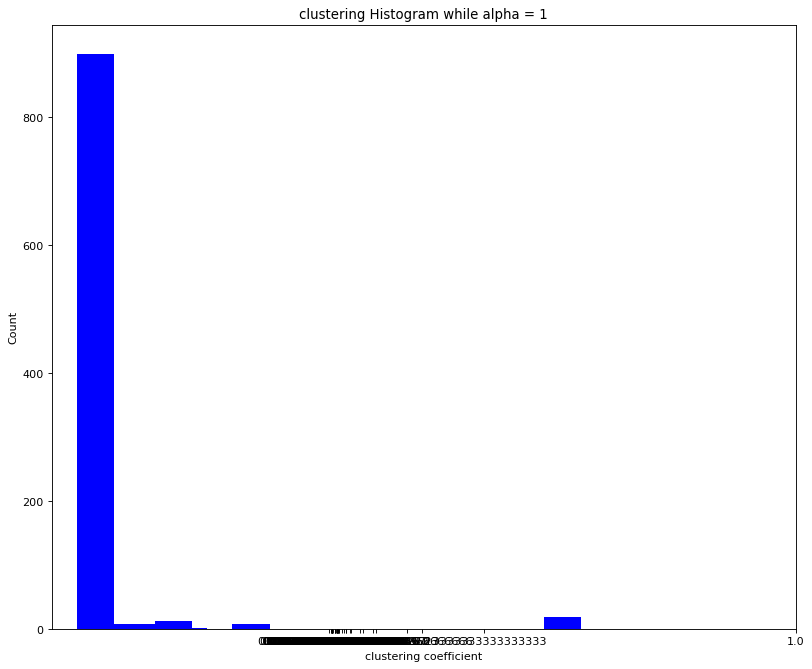

In [134]:
clu4 = nx.clustering(g4)
clustering_sequence = sorted(clu4.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d + 0.5 for d in deg])
ax.set_xticklabels(deg)

plt.show()

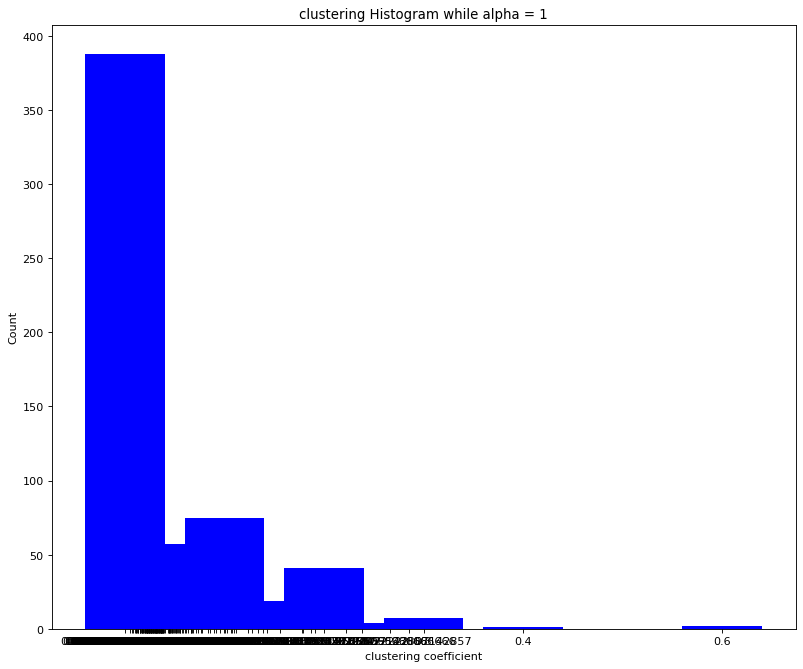

In [135]:
clu5 = nx.clustering(g5)
clustering_sequence = sorted(clu5.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

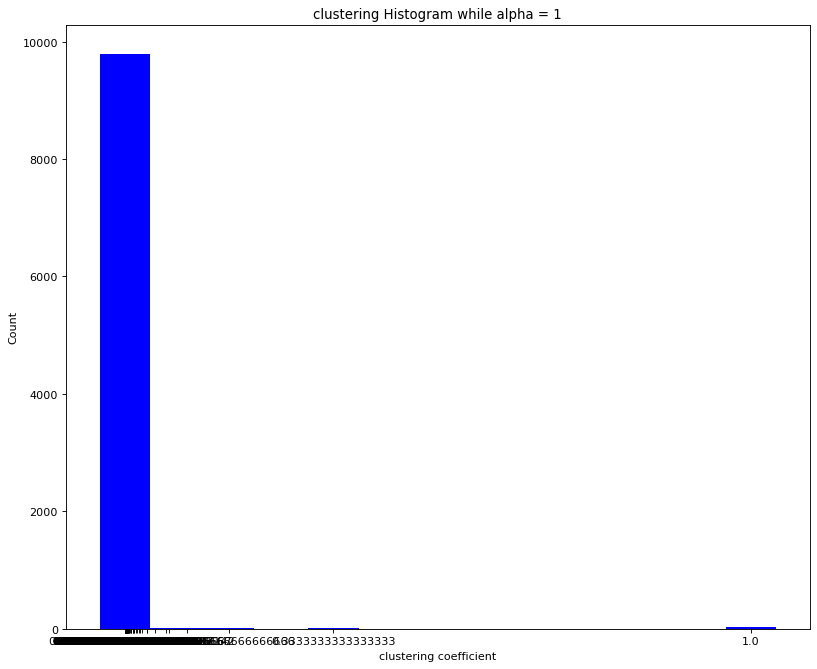

In [136]:
clu6 = nx.clustering(g6)
clustering_sequence = sorted(clu6.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

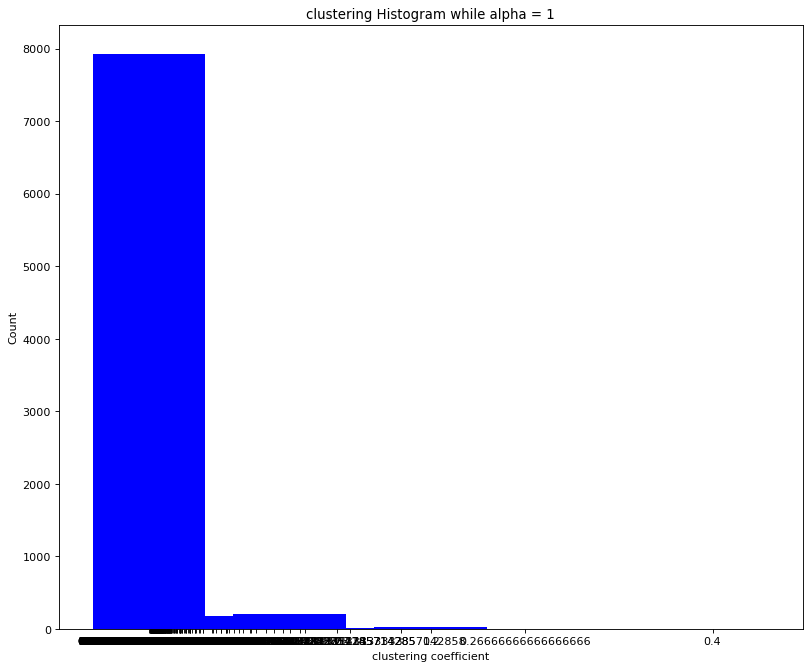

In [137]:
clu7 = nx.clustering(g7)
clustering_sequence = sorted(clu7.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

## Task 3: Another Candidate Model for Describing Social Networks
### As you know, the Watts-Strogatz generative model was proposed in 1998 in order to address certain limitation(s) of Erdos-Renyi random graphs in the context of modeling real-world social networks. In this task and the next, you will examine the properties of Watts-Strogatz networks and compare them with those of Barabasi-Albert networks (one of whose objectives is to model social networks) as well as ER random graphs. 

### Using NetworkX generate three Watts-Strogatz Random Graphs (WSRGs) with n = 1000 nodes and with parameters k = 5, and p = 0.2, 0.5, and 0.8.

In [118]:
g8 = nx.watts_strogatz_graph(1000,5,0.2)
g9 = nx.watts_strogatz_graph(1000,5,0.5)
g10 = nx.watts_strogatz_graph(1000,5,0.8)

### Use NetworkX to store the graphs in .gml and then visualize them using Gephi. Include your visualizations in SVG format in your notebook.


In [119]:
nx.write_gml(g8, "task31.gml")
nx.write_gml(g9, "task32.gml")
nx.write_gml(g10, "task33.gml")

p = 0.2


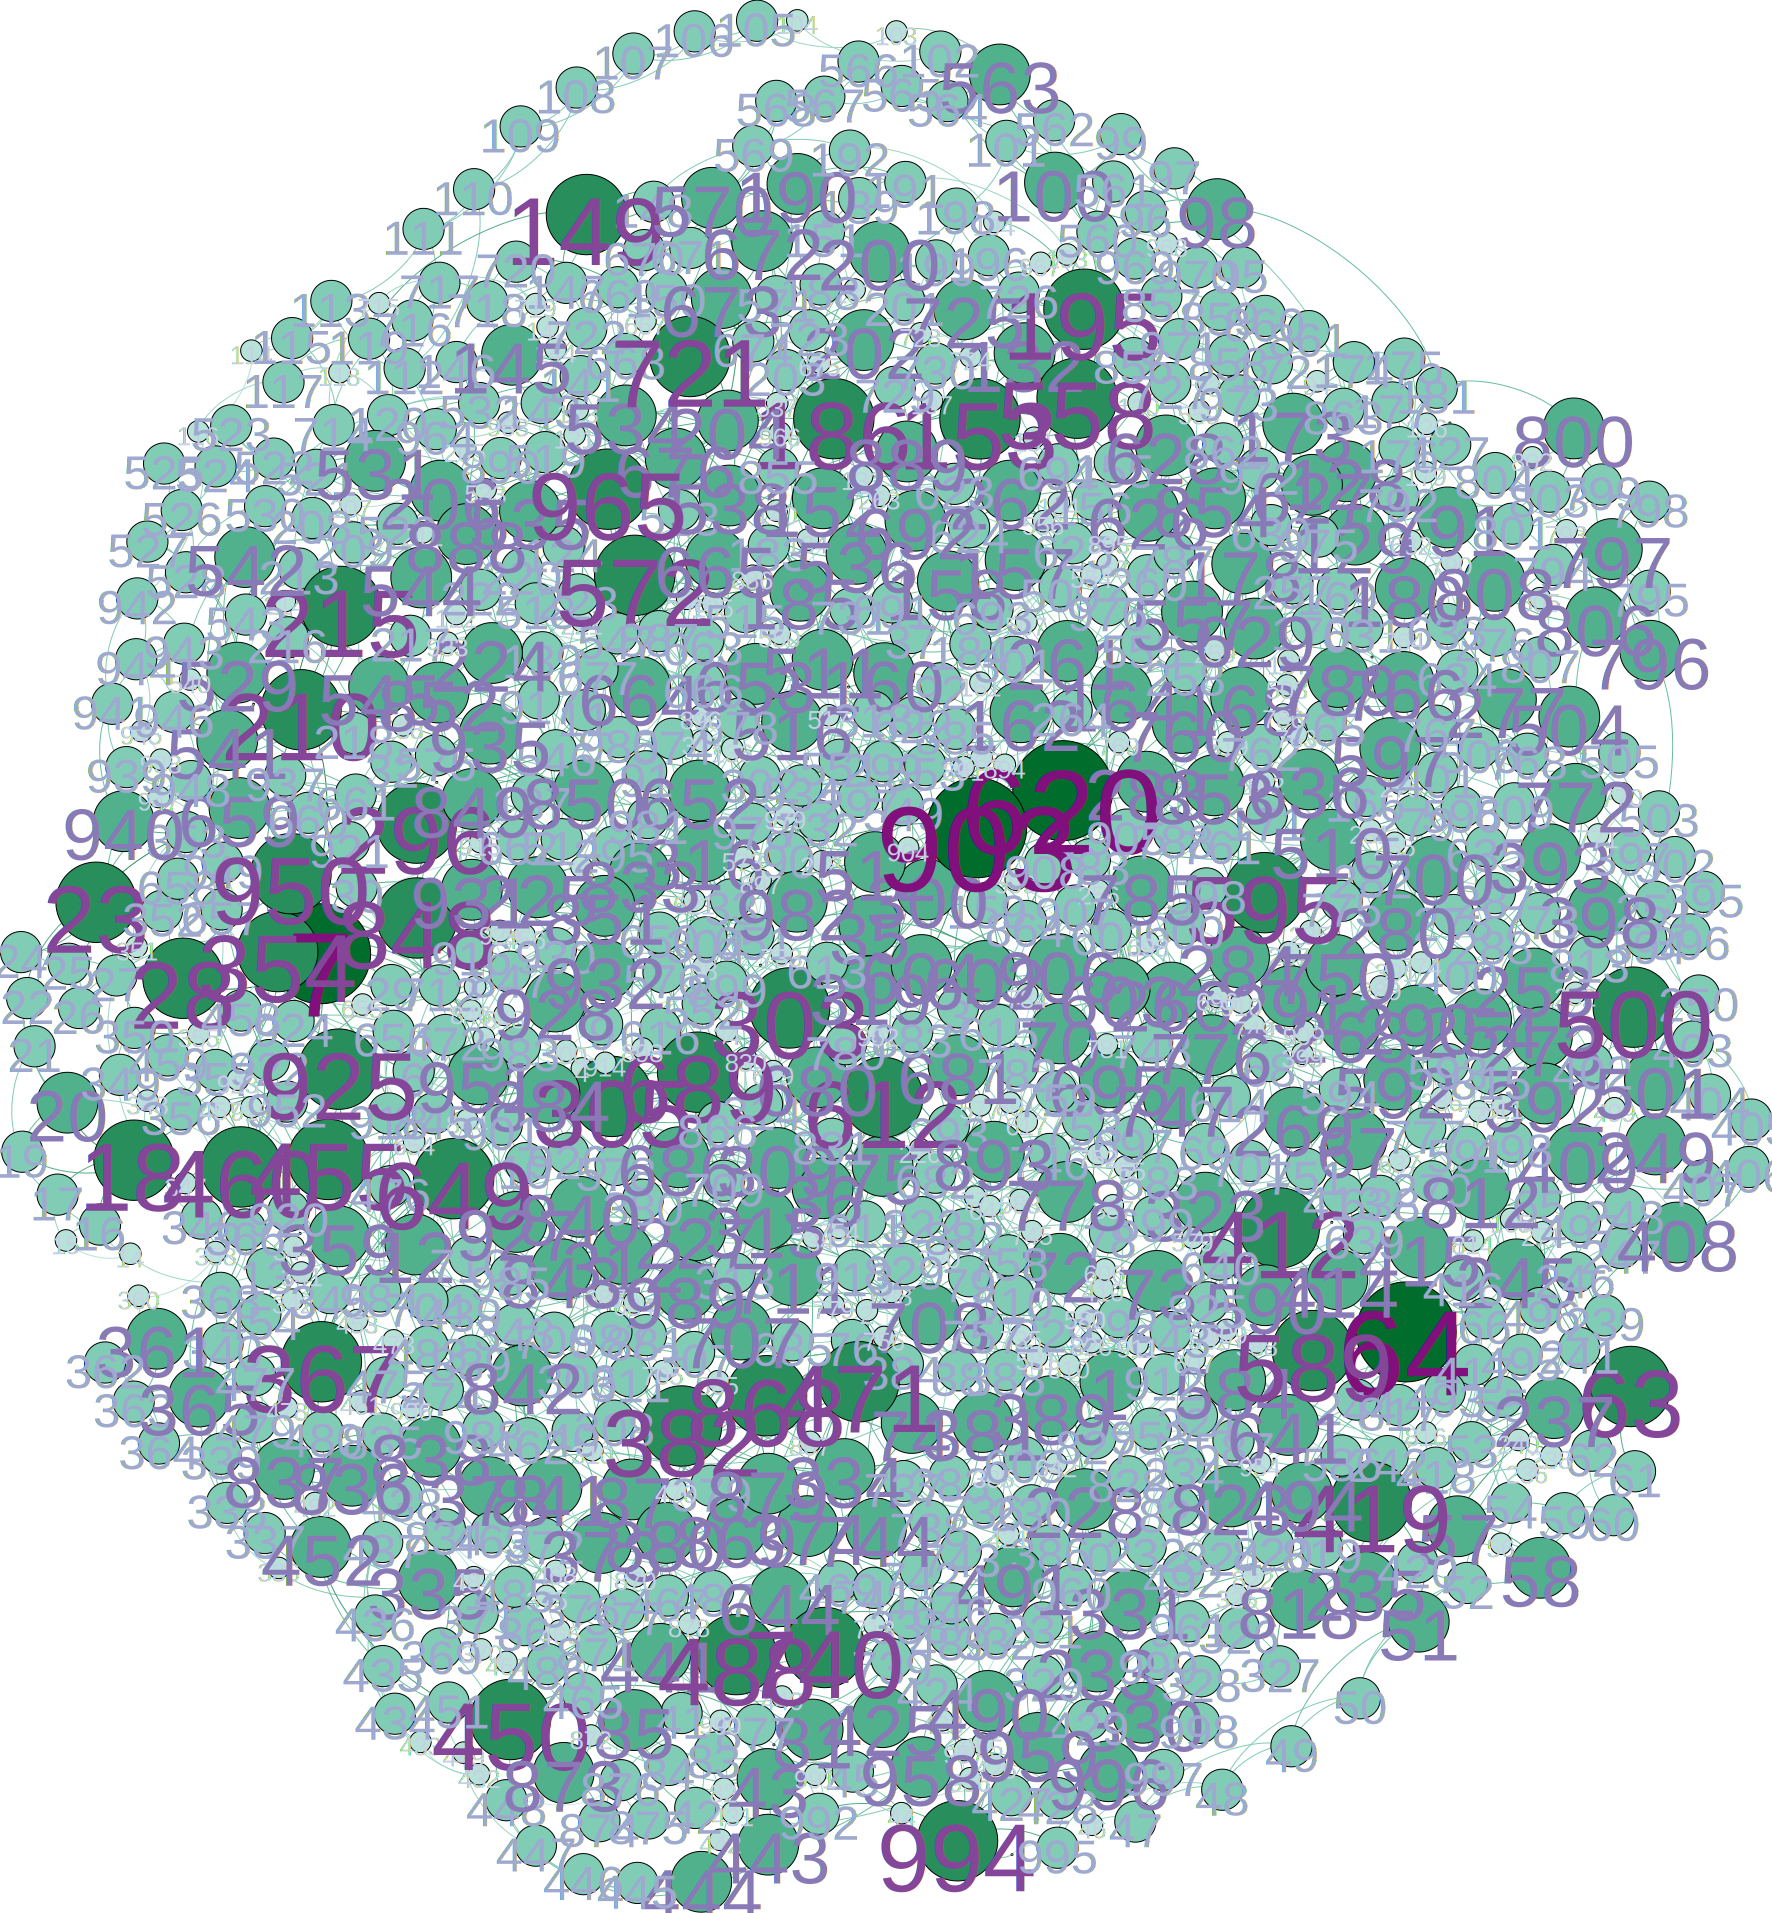

In [125]:
print("p = 0.2")
display(SVG('task31.svg'))

p = 0.5


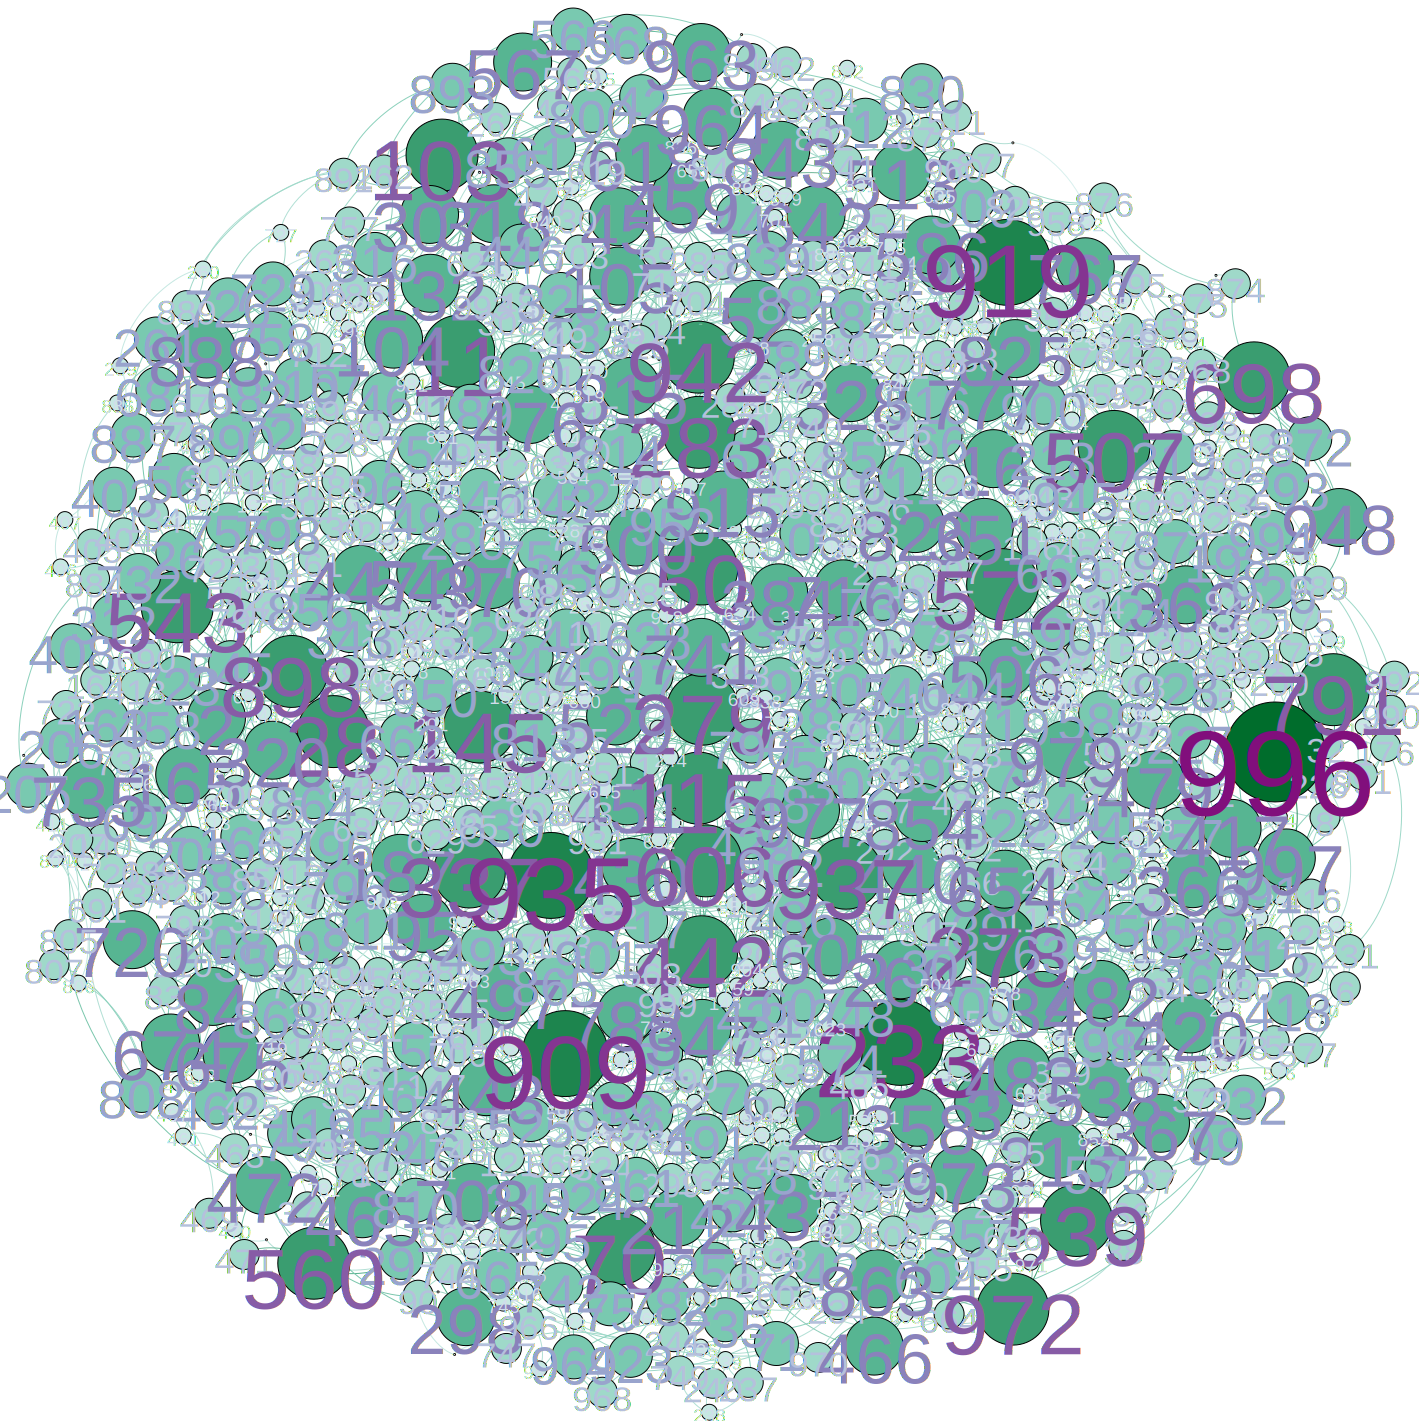

In [126]:
print("p = 0.5")
display(SVG('task32.svg'))

p = 0.8


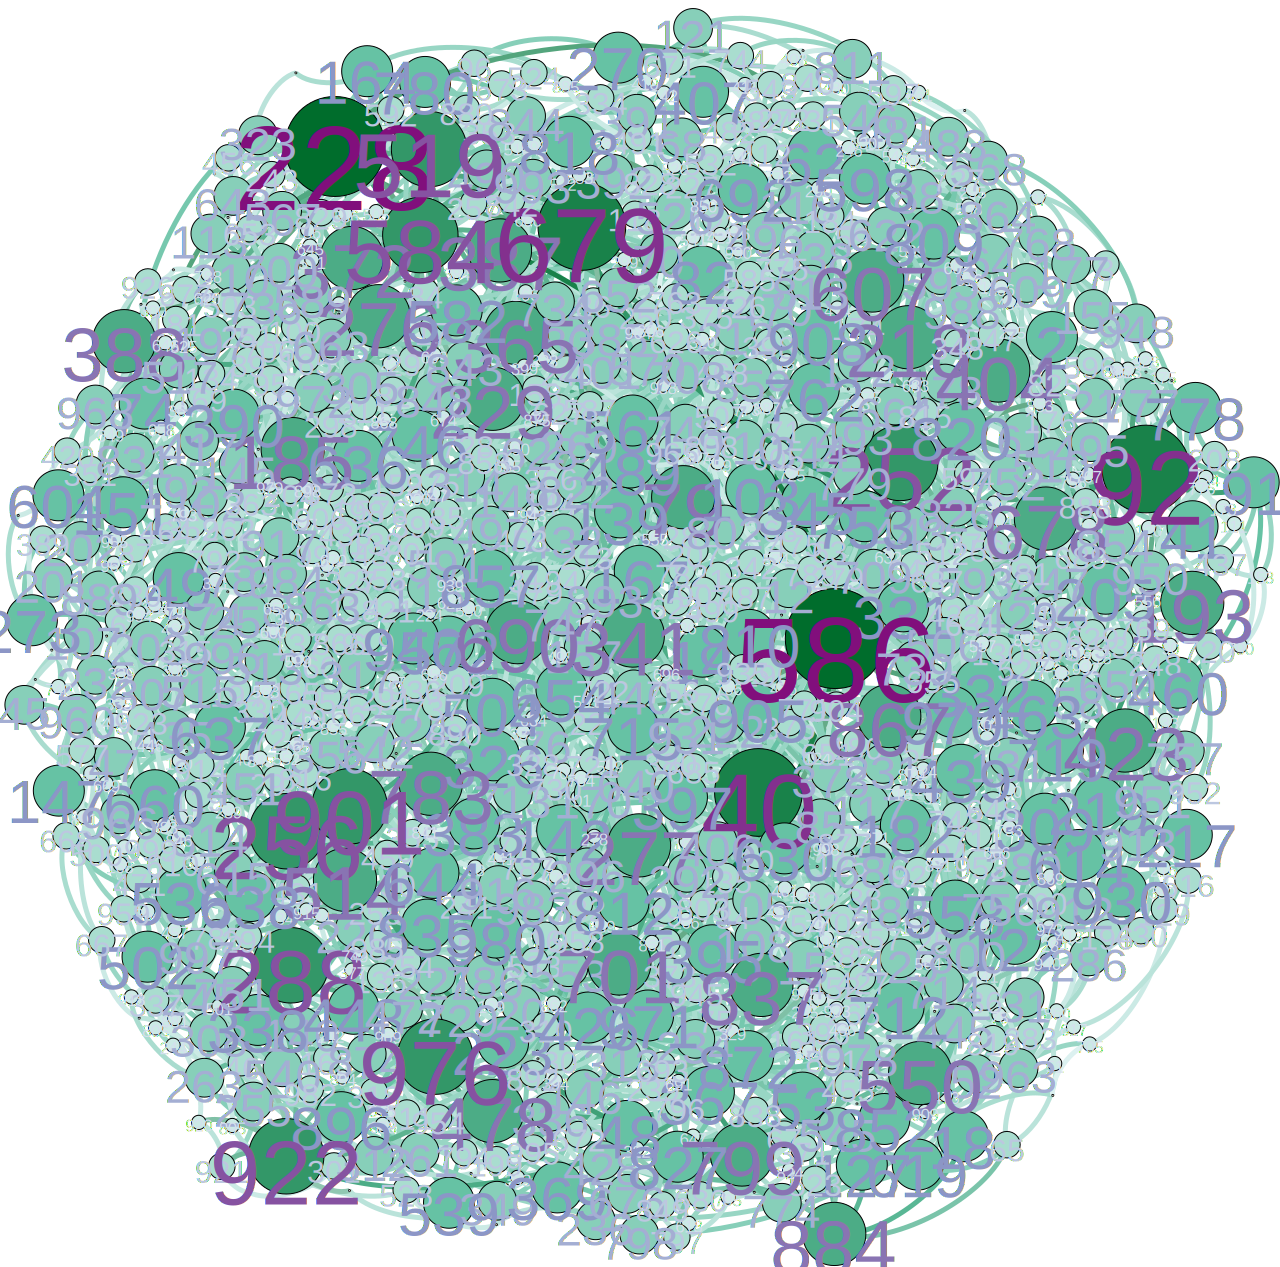

In [127]:
print("p = 0.8")
display(SVG('task33.svg'))

### Plot the degree distibution of these graphs in arithmetic and log-log scale figures. Based on the plots, do you think Watts-Strogatz networks follow a power-law degree distribution? Why or why not?

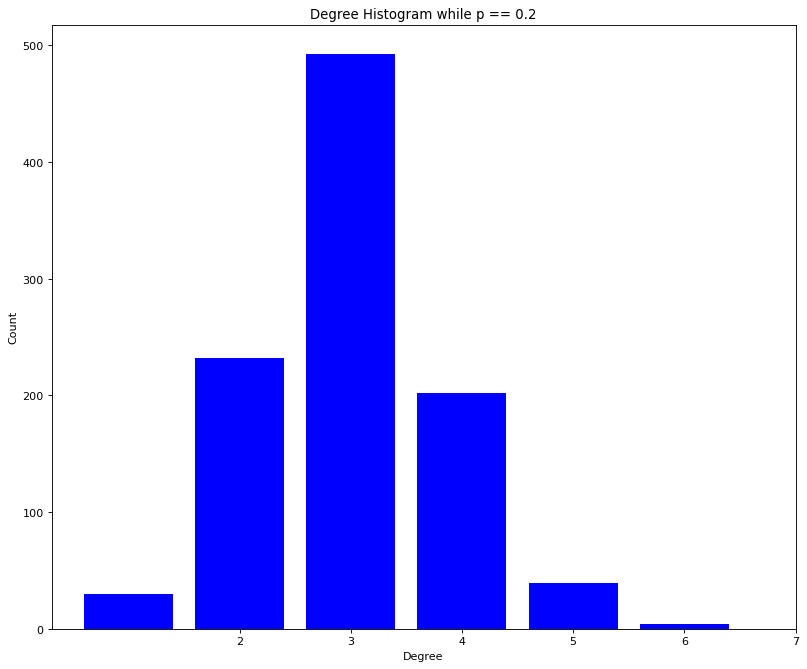

In [129]:
degree_sequence = sorted([d for n, d in g8.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while p == 0.2")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()

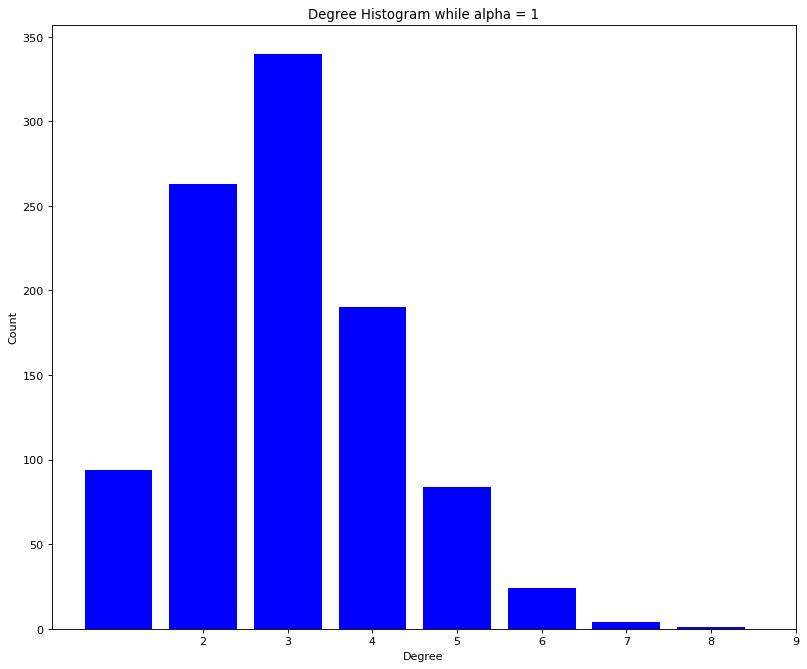

In [131]:
degree_sequence = sorted([d for n, d in g9.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()

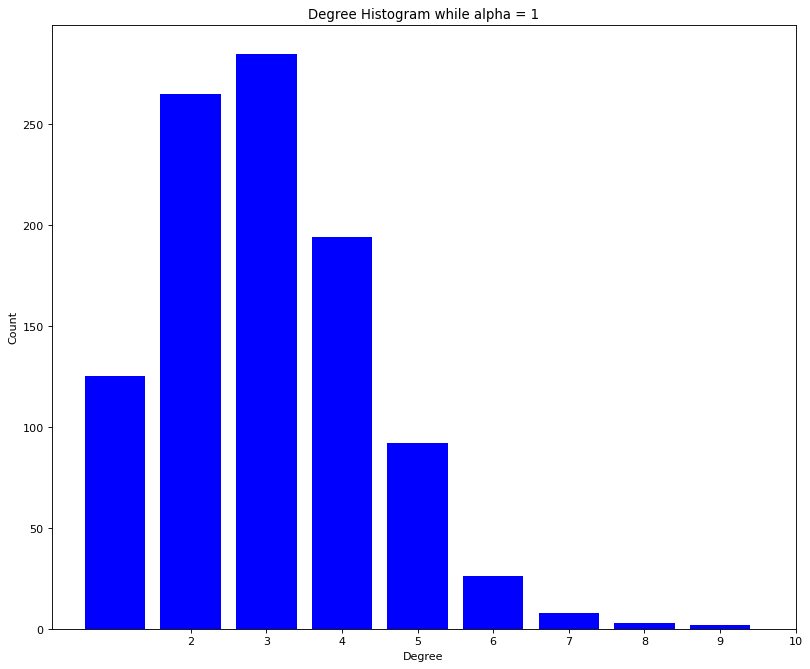

In [132]:
degree_sequence = sorted([d for n, d in g10.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.8, color="b")

plt.title("Degree Histogram while alpha = 1")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 1 for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [ ]:
################################################################
#No. They are more like binomial random distribution

### Calculate the diamaters and the average shortest path lengths of these graphs. Also plot the clustering coefficients of the nodes of these graphs. Compare these results with the ones you obtained for the Barabasi-Albert model. Based on this comparison, which of the two models is a better choice for describing online social networks in your opinion? Explain your answer.

In [133]:
print("diameter of p=0.2:", nx.algorithms.distance_measures.diameter(g8))
print("average shortest path of p=0.2:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g8))
print("diameter of p=0.5:", nx.algorithms.distance_measures.diameter(g9))
print("average shortest path of p=0.5:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g9))
print("diameter of p=0.8:", nx.algorithms.distance_measures.diameter(g10))
print("average shortest path of p=0.8:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(g10))

diameter of p=0.2: 13
average shortest path of p=0.2: 6.9064404404404405
diameter of p=0.5: 10
average shortest path of p=0.5: 5.602846846846846
diameter of p=0.8: 9
average shortest path of p=0.8: 5.356424424424424


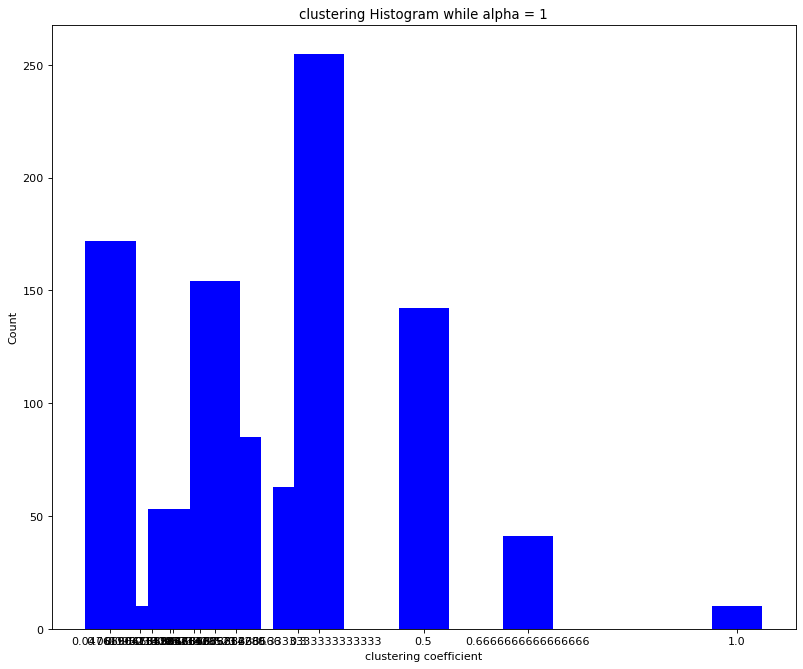

In [138]:
clu8 = nx.clustering(g8)
clustering_sequence = sorted(clu8.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 0.2")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

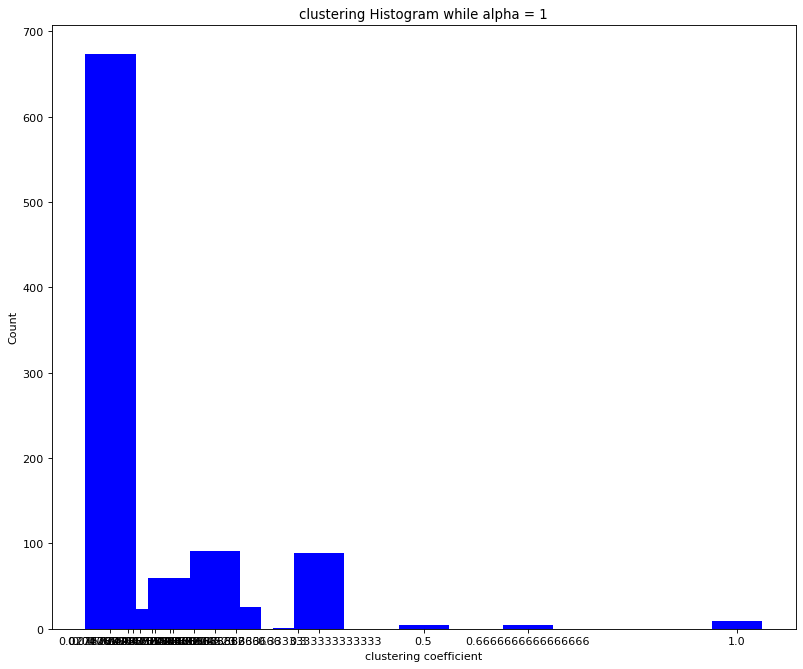

In [139]:
clu9 = nx.clustering(g9)
clustering_sequence = sorted(clu9.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 0.5")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

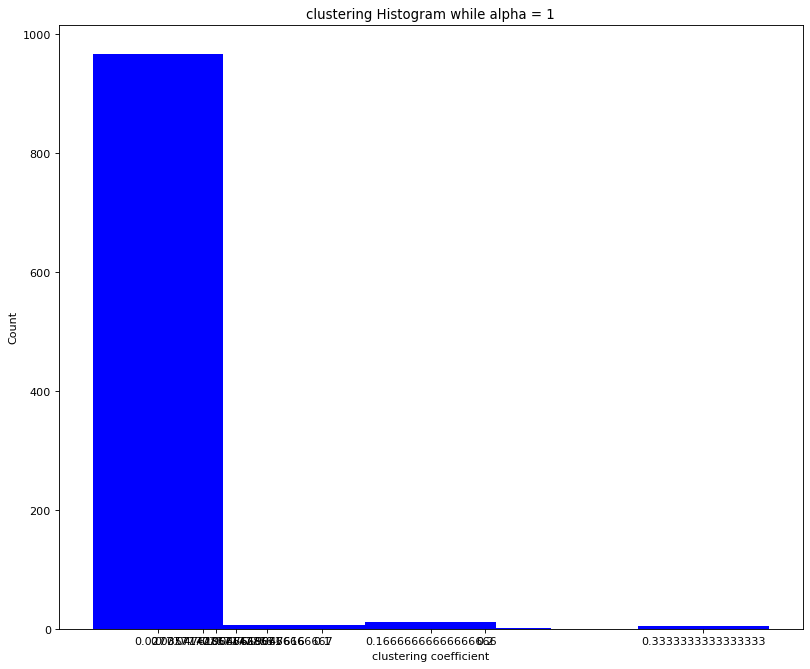

In [140]:
clu10 = nx.clustering(g10)
clustering_sequence = sorted(clu10.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 0.8")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [ ]:
#############################################################################################################################################
#To me, the Barabasi Albert(BA) model is better. First, my observation of clustering coefficients distribution above shows that the 
#Watts Strogatz(WS) model does express more obvious clustering than the BA model. However, the WS model exaggerates the extend of clustering.
#In the graphs I generated for WS model, it's very likely that every node tends to have an equal degree comapred to the BA model. In reality,
#the importance of every node is highly varied. Well-known celebrities do have much more links than the normal people, which is exactly
#expressed by the BA model. With those highly linked nodes, it makes sense that the diameter and the shortest path length become very small.

### Now, consider a network that describes the hierarchical structure of an organization, i.e., a network that captures the hierarchical connections between the employees of the organization. It is a network in which two employees are connected by an edge if and only if one of them is the immediate supervisor/boss of the other. Do you think either of the two models that you have examined so far is suitable for describing such a hierarchical network? Why or why not? You may assume that if an employee has two or more immediate supervisors, then all of these supervisors are located at the same level in the hierarchy of the organization

In [ ]:
##############################################################################################################################################
#The BA model is suitble for such a network. Because in the real organizations, the number of supervisors and bosses is far less than the
#number of their employees. It is always that a few chiefs supervise a lot of employees. In this way, in a network of an organization, there
#are always nodes that is much more connected than the others, and those nodes represent the supervisor. Also, since the employees under
#supervision are in the same hierarchy, they do not connect to each other. Hence the extend of clustering of such a network is low.

## Task 4 (Bonus Task): Do the above models outperform ER Random Graphs?

### Using NetworkX generate six Erdos Renyi Random Graphs (ERRGs) with n = 1000 nodes and with parameters p = 0.5/n, 1/n, 1.5/n, 0.5ln(n)/n, ln(n)/n, 1.5ln(n)/n.  

In [3]:
n = 1000
e1 = nx.generators.random_graphs.erdos_renyi_graph(n, 0.5/n)
e2 = nx.generators.random_graphs.erdos_renyi_graph(n, 1/n)
e3 = nx.generators.random_graphs.erdos_renyi_graph(n, 1.5/n)
e4 = nx.generators.random_graphs.erdos_renyi_graph(n, 0.5*np.log(n)/n)
e5 = nx.generators.random_graphs.erdos_renyi_graph(n, np.log(n)/n)
e6 = nx.generators.random_graphs.erdos_renyi_graph(n, 1.5*np.log(n)/n)

### Calculate the diamaters and the average shortest path lengths of these graphs. Also plot the clustering coefficients of the nodes of these graphs. Compare these results with the ones you obtained for the previous models. Based on your comparison, do you think that the Barabasi-Albert and the Watts-Strogatz models are better choices than the Erdos-Renyi Model for describing online social networks? Explain your answer.

In [8]:
largest1 = e1.subgraph(max(nx.connected_components(e1), key=len))
print("diameter of p=0.5/n:", nx.diameter(largest1))
print("average shortest path of p=0.5/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest1))
largest2 = e2.subgraph(max(nx.connected_components(e2), key=len))
print("diameter of p=1/n:", nx.algorithms.distance_measures.diameter(largest2))
print("average shortest path of p=1/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest2))
largest3 = e3.subgraph(max(nx.connected_components(e3), key=len))
print("diameter of p=1.5/n:", nx.algorithms.distance_measures.diameter(largest3))
print("average shortest path of p=1.5/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest3))
largest4 = e4.subgraph(max(nx.connected_components(e4), key=len))
print("diameter of p=0.5ln(n)/n:", nx.algorithms.distance_measures.diameter(largest4))
print("average shortest path of p=0.5ln(n)/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest4))
largest5 = e5.subgraph(max(nx.connected_components(e5), key=len))
print("diameter of p=ln(n)/n:", nx.algorithms.distance_measures.diameter(largest5))
print("average shortest path of p=ln(n)/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest5))
largest6 = e6.subgraph(max(nx.connected_components(e6), key=len))
print("diameter of p=1.5ln(n)/n:", nx.algorithms.distance_measures.diameter(largest6))
print("average shortest path of p=1.5ln(n)/n:", nx.algorithms.shortest_paths.generic.average_shortest_path_length(largest6))

diameter of p=0.5/n: 12
average shortest path of p=0.5/n: 4.75
diameter of p=1/n: 28
average shortest path of p=1/n: 11.22178762856729
diameter of p=1.5/n: 27
average shortest path of p=1.5/n: 11.546827170361187
diameter of p=0.5ln(n)/n: 13
average shortest path of p=0.5ln(n)/n: 5.507375752492382
diameter of p=ln(n)/n: 7
average shortest path of p=ln(n)/n: 3.825693513405949
diameter of p=1.5ln(n)/n: 5
average shortest path of p=1.5ln(n)/n: 3.1843423423423425


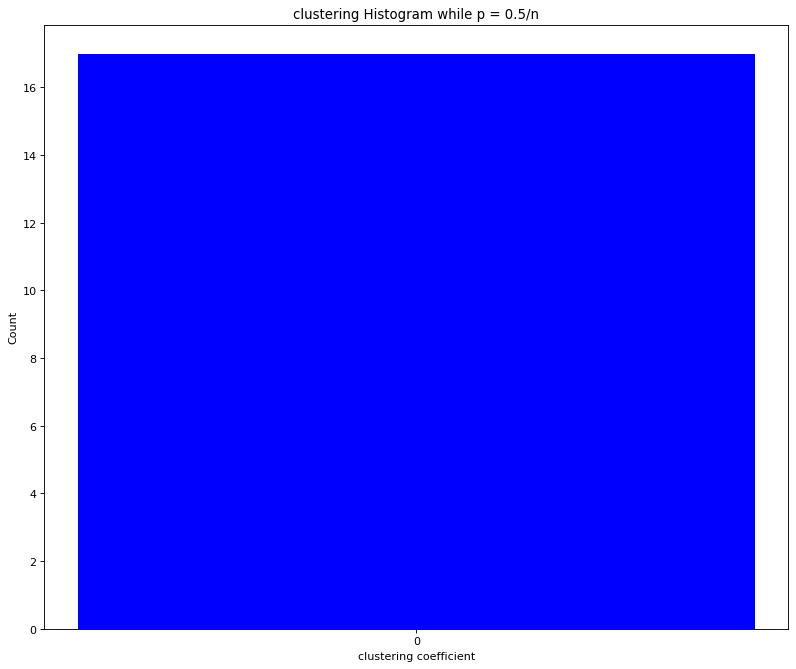

In [12]:
clu11 = nx.clustering(largest1)
clustering_sequence = sorted(clu11.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 0.5/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

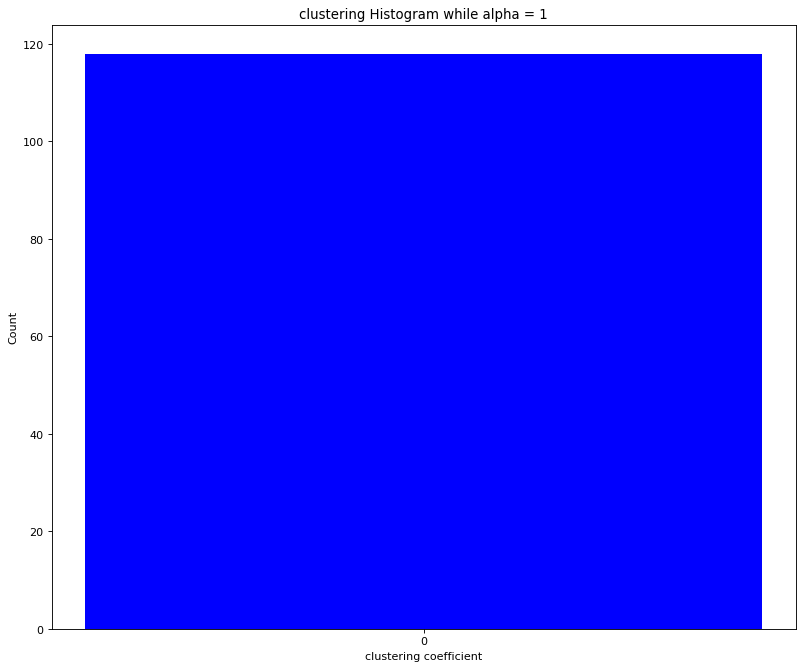

In [11]:
clu12 = nx.clustering(largest2)
clustering_sequence = sorted(clu12.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 1/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

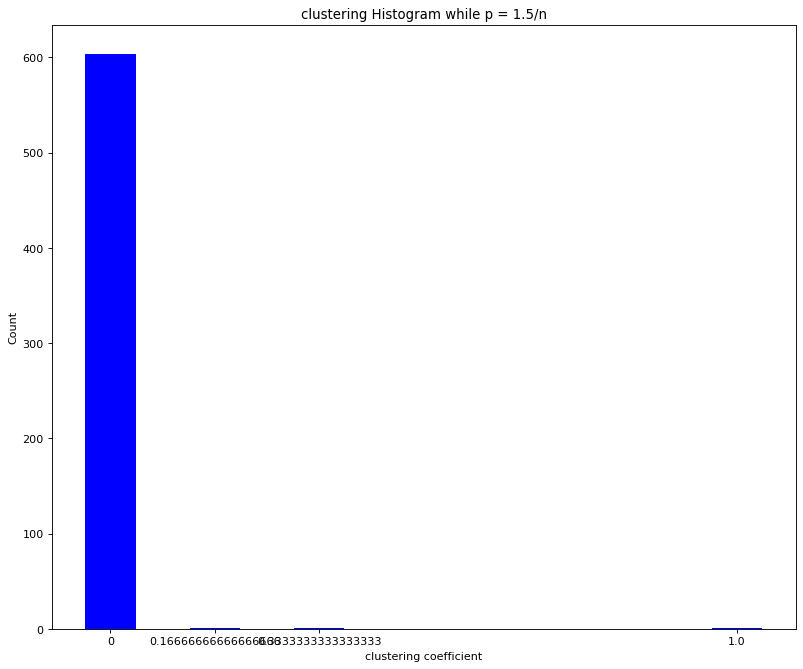

In [13]:
clu13 = nx.clustering(largest3)
clustering_sequence = sorted(clu13.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 1.5/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

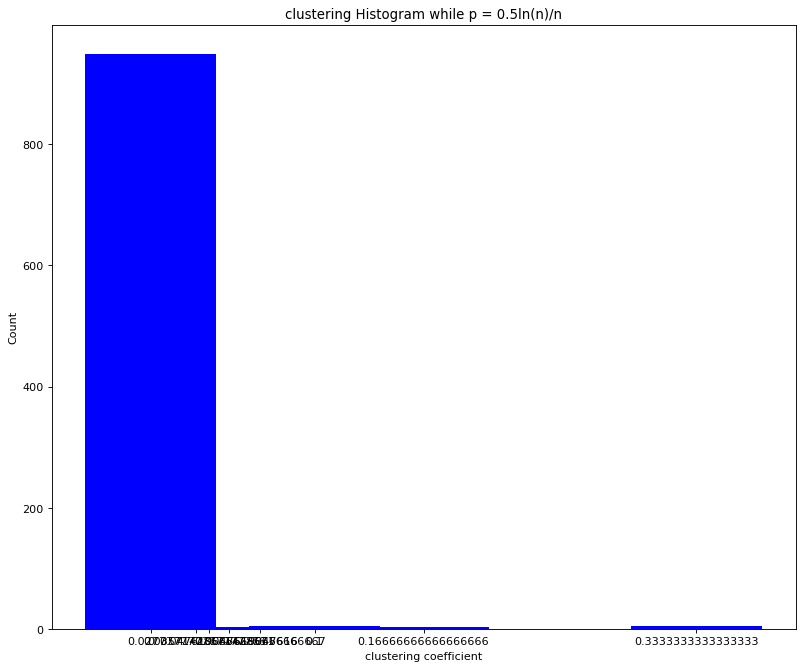

In [14]:
clu14 = nx.clustering(largest4)
clustering_sequence = sorted(clu14.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 0.5ln(n)/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

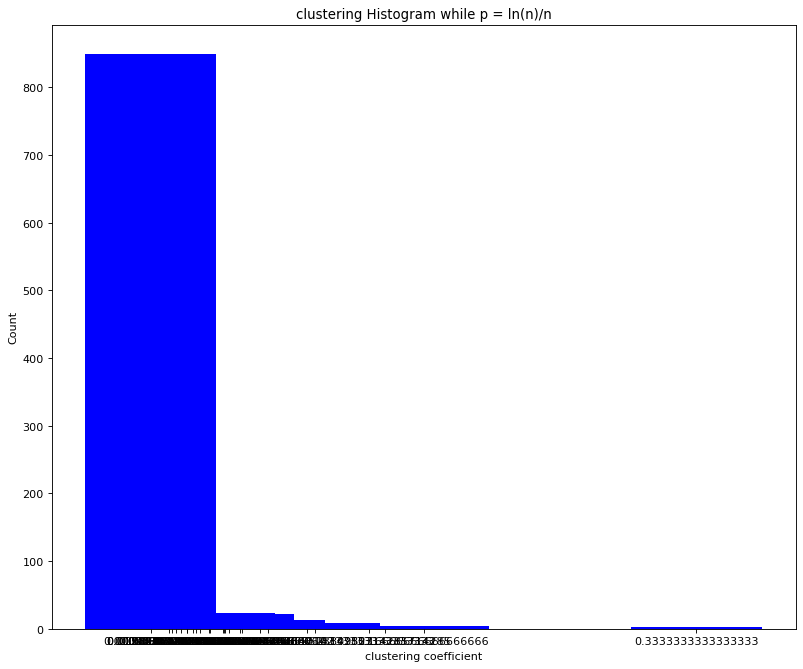

In [15]:
clu15 = nx.clustering(largest5)
clustering_sequence = sorted(clu15.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = ln(n)/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

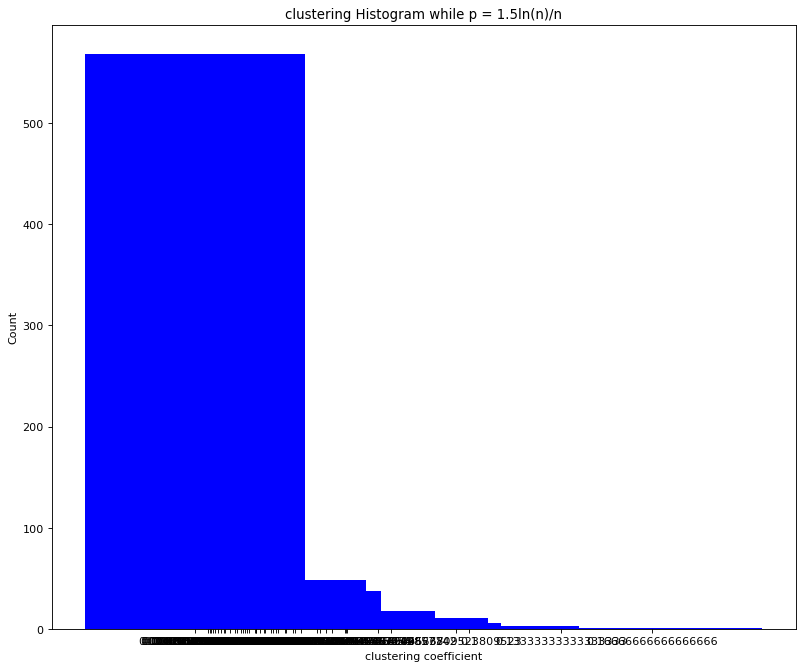

In [22]:
clu16 = nx.clustering(largest6)
clustering_sequence = sorted(clu16.values(), reverse=True)  # degree sequence
Count = collections.Counter(clustering_sequence)
deg, cnt = zip(*Count.items())

fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
plt.bar(deg, cnt, width=0.08, color="b")

plt.title("clustering Histogram while p = 1.5ln(n)/n")
plt.ylabel("Count")
plt.xlabel("clustering coefficient")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [ ]:
############################################################################################################################################
#To my opinion, the WS and BA model do better fit the internet. According to the clustering coefficient histogram, the Erdos Renyi(ER) model
#fails to generate as much clustering as the former two. In some circumstances, the clustering coefficients of all nodes become 0. Whereas
#in the real internet, the clustering are always present.
#Also, the ER model may generate partially connected graph. From my experience on the social network, one can usually reach to anyone else
#in some way, except that he or she refuses to join in the social media. Besides, those accounts that are not commonly used are not valuable
#enough for us to analyze. So excluding those accounts that are not commonly used, we can expect a fully connected network on the internet. 
#The ER model fails to generate a fully connected graph.